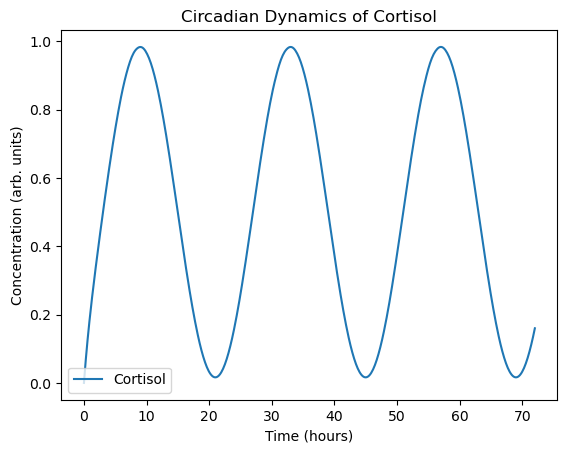

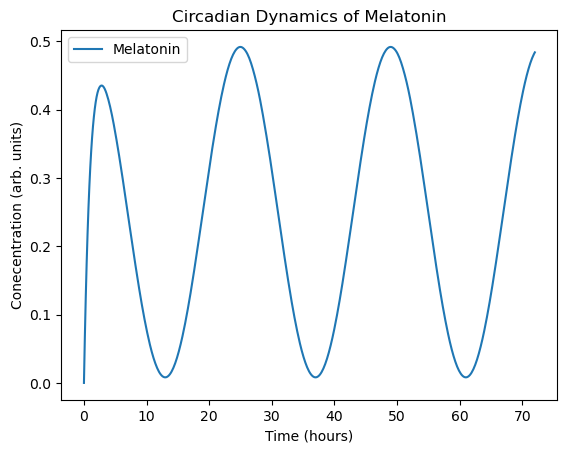

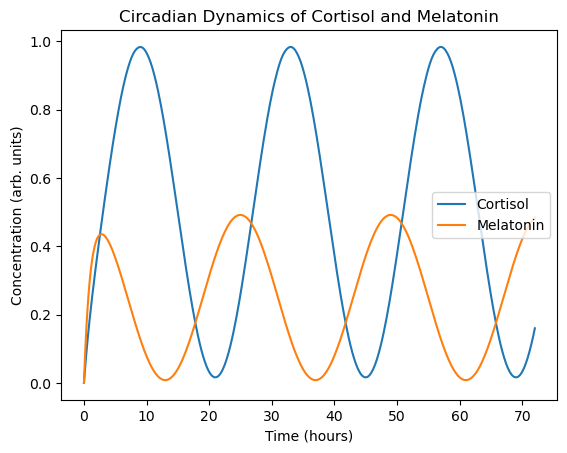

In [2]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt


# set parameters for melatonin and cortisol circadian rates
P_c, k_c, phi_c = 1.0, 1.0, 8 #Cortisol: production rate, clearing rate, peak time (hours)
P_m, k_m, phi_m = 0.5, 1.0, 0 #Melatonin: production rate, clearing rate, peak time (hours)
omega = (2 * np.pi) / 24


## time varying production functions based on shifted cos to model circadian rhythm
def f_cort(t):
    return (1 + np.cos(omega * (t - phi_c))) / 2

def f_mel(t):
    return (1 + np.cos(omega * (t - phi_m))) / 2


## system of differential equations
def hormone_system(t, y):
    C, M = y
    dCdt = P_c * f_cort(t) - k_c * C
    dMdt = P_m * f_mel(t) - k_m * M
    return [dCdt, dMdt]
## t_span is the time length of the cycle

t_span = (0, 72)
y0 = [0, 0]
t_eval = np.linspace(t_span[0], t_span[1], 500)

sol = solve_ivp(hormone_system, t_span, y0, t_eval = t_eval)

## plots
plt.figure()
plt.plot(sol.t, sol.y[0], label='Cortisol')
plt.xlabel('Time (hours)')
plt.ylabel('Concentration (arb. units)')
plt.title('Circadian Dynamics of Cortisol')
plt.legend()
plt.show()

plt.figure()
plt.plot(sol.t, sol.y[1], label='Melatonin')
plt.xlabel('Time (hours)')
plt.ylabel('Conecentration (arb. units)')
plt.title('Circadian Dynamics of Melatonin')
plt.legend()
plt.show()


plt.figure()
plt.plot(sol.t, sol.y[0], label='Cortisol')
plt.plot(sol.t, sol.y[1], label='Melatonin')
plt.xlabel('Time (hours)')
plt.ylabel('Concentration (arb. units)')
plt.title('Circadian Dynamics of Cortisol and Melatonin')
plt.legend()
plt.show()